# Inside the Decentralised Casino

In [1]:
# The first step is to load in gamba so we can use its methods
import sys
import pandas as pd
pd.options.display.float_format = '{:,.3f}'.format
import gamba as gb

thank you for using gamba!


In [2]:
raw_data = gb.read_csv('/home/ojs/Desktop/raw_matched_data.csv', ['bet_time','payout_time','duration'])
gb.summarise_app(raw_data)

users: 24234
games: 5
num bets: 2232741
bet value: 2723287.792136176
payout value: 2688008.0368767725
start: 2018-08-04 04:27:21 6084746
end: 2020-03-09 19:32:55 9639151



In [5]:
df = raw_data

providers = ['dice2win','fck','etheroll']
games = ['coinflip','onedice','twodice','roll']
all_games = []
game_players = []
for provider in providers:
    for game in games:
        game_provider_combo = df[(df['provider'] == provider) & (df['game_type'] == game)]
        if len(game_provider_combo) == 0:
            continue
        all_games.append(game_provider_combo)
        game_players.append(set(game_provider_combo['player_id'].values))
        print('n=', len(set(game_provider_combo['player_id'])), 'b=', len(game_provider_combo))

temp = None
for provider in providers:
    print(provider)
    temp = df[(df['provider'] == provider) & (df['game_type'].isin(games))]
    gb.summarise_app(temp)

n= 5742 b= 702502
n= 2979 b= 240728
n= 1633 b= 167759
n= 3014 b= 416134
n= 13877 b= 137011
n= 567 b= 48331
n= 293 b= 27163
n= 396 b= 36316
n= 3086 b= 362324
dice2win
users: 7868
games: 4
num bets: 1527123
bet value: 1267239.950539507
payout value: 1245815.2785478367
start: 2018-09-07 08:17:21 6287216
end: 2020-03-09 19:32:55 9639151

fck
users: 14466
games: 4
num bets: 248821
bet value: 465195.8532056361
payout value: 462136.7118950764
start: 2018-12-10 06:05:13 6859200
end: 2019-07-02 08:49:06 8071084

etheroll
users: 3086
games: 1
num bets: 362324
bet value: 420942.44164378115
payout value: 419067.602043743
start: 2018-08-04 04:27:21 6084746
end: 2020-03-09 17:35:39 9638617



In [5]:
gb.calculate_labrie_measures(raw_data, filename='measures_table.csv', daily=False)

  0%|          | 0/24234 [00:00<?, ?it/s]

calculating LaBrie measures for 24234 players, this may take some time...


100%|██████████| 24234/24234 [42:35<00:00,  9.48it/s]  


,player_id,duration,frequency,num_bets,average_bets_per_day,average_bet_size,total_wagered,net_loss,percent_loss
0,385c962fd68092801729343fc9a3ce258e2165a4a3aba2...,1,100.000,3,3.000,0.020,0.060,0.016,26.003
1,f8b88d1f06f7087bdb22250a7aff7bc1085cba521edb2b...,198,3.535,21,3.000,0.239,5.010,2.507,50.040
2,d0ebeed0f8b44f638da648c08b0457885be9c25cdfde11...,1,100.000,1,1.000,0.150,0.150,-0.071,-47.500
3,b8785c2405bb46079c7c09f7d4b5178c5c4eb2118e7263...,7,100.000,7,1.000,0.100,0.700,-0.084,-12.023
4,d7dba1716325bc4d427d03b7f9c6abbde65fe629d2acfb...,1,100.000,1,1.000,0.510,0.510,0.510,100.000
...,...,...,...,...,...,...,...,...,...
24229,b9bdb9f1bf0353d8d4c21666bebb0915e1260147fff0c8...,3,100.000,3,1.000,0.099,0.298,0.298,100.000
24230,dab9fa26701a115f7947d786803354afc68122f174c4b4...,3,100.000,3,1.000,0.100,0.299,0.299,100.000
24231,4ff3c157c69a9d89b62eed1734d19c935556beb01554c3...,7,100.000,7,1.000,0.100,0.700,-0.280,-40.029
24232,469b2e81399d51301f50fa2612f606dc0624c018f8ff9f...,9,100.000,9,1.000,0.092,0.832,0.292,35.090


In [6]:
measures = gb.read_csv('measures_table.csv')

game_measures = []
for players in game_players:
    game_measures.append(measures[measures['player_id'].isin(players)])

labels = ['d2w_f','d2w_d','d2w_2d','d2w_r','fck_f','fck_d','fck_2d','fck_r','eroll']
matrix = gb.calculate_walker_matrix(game_measures, labels, measure='duration')
display(matrix)

,d2w_f,d2w_d,d2w_2d,d2w_r,fck_f,fck_d,fck_2d,fck_r,eroll
d2w_f,-,,,,,,,,
d2w_d,0.160,-,,,,,,,
d2w_2d,0.24**,0.100,-,,,,,,
d2w_r,0.170,0.030,0.080,-,,,,,
fck_f,0.55**,0.39**,0.46**,0.39**,-,,,,
fck_d,0.22**,0.08**,0.050,0.050,0.43**,-,,,
fck_2d,0.4**,0.25**,0.16**,0.23**,0.59**,0.2**,-,,
fck_r,0.34**,0.19**,0.1**,0.17**,0.54**,0.13**,0.070,-,
eroll,0.090,0.120,0.19**,0.110,0.49**,0.14**,0.34**,0.27**,-


In [7]:
# human players are non-fck_flip players
human_df = measures[~measures['player_id'].isin(game_players[4])]
print(len(human_df), human_df['num_bets'].sum())

10357 1743478


In [14]:
table = gb.add_tables(gb.descriptive_table(human_df, extended=True), gb.ks_test(human_df))
spearman_coefficient_table = gb.spearmans_r(human_df)
other95, top5 = gb.get_labelled_groups(gb.top_split(human_df, 'total_wagered'), 'top_total_wagered')
print(len(top5), len(other95))
comparison_table = gb.add_tables(gb.descriptive_table(top5, extended=True), gb.descriptive_table(other95, extended=True))

518 9839


In [15]:
display(table, spearman_coefficient_table, comparison_table)

,mean,std,median,iqr,K-S Score,p
duration,29.695,80.645,1.000,10.000,0.841,0.000
frequency,76.382,36.450,100.000,50.000,0.966,0.000
num_bets,168.338,991.976,11.000,62.000,0.841,0.000
average_bets_per_day,23.126,47.872,6.000,21.000,0.841,0.000
average_bet_size,1.152,11.811,0.113,0.353,0.504,0.000
total_wagered,213.770,"2,451.852",1.400,16.590,0.504,0.000
net_loss,2.911,49.864,0.041,0.711,0.213,0.000
percent_loss,10.913,112.137,5.327,51.991,0.548,0.000


,duration,frequency,num_bets,average_bets_per_day,average_bet_size,total_wagered,net_loss,percent_loss
duration,-,,,,,,,
frequency,-0.89**,-,,,,,,
num_bets,0.63**,-0.45**,-,,,,,
average_bets_per_day,0.35**,-0.19**,0.93**,-,,,,
average_bet_size,0.16**,-0.1**,0.26**,0.24**,-,,,
total_wagered,0.53**,-0.37**,0.84**,0.78**,0.72**,-,,
net_loss,0.12**,-0.1**,0.15**,0.14**,0.15**,0.2**,-,
percent_loss,-0.1**,0.06**,-0.15**,-0.12**,-0.07**,-0.14**,0.67**,-


,mean,std,median,iqr,mean,std,median,iqr
duration,95.560,138.375,35.000,120.000,26.227,74.829,1.000,7.000
frequency,55.033,35.143,50.000,78.349,77.506,36.172,100.000,50.000
num_bets,"1,787.716","3,951.361",644.000,"1,660.000",83.082,264.546,9.000,47.000
average_bets_per_day,90.584,95.034,68.022,77.057,19.575,41.055,5.000,17.690
average_bet_size,13.767,50.531,1.841,5.613,0.488,1.960,0.102,0.279
total_wagered,"3,874.377","10,306.803",986.389,"1,759.015",21.048,53.574,1.100,10.890
net_loss,38.077,216.264,10.302,102.597,1.059,9.535,0.039,0.600
percent_loss,0.947,9.048,0.903,7.598,11.438,115.009,6.556,57.556
top_total_wagered,1.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000


In [13]:
gb.ks_test(other95)

,K-S Score,p
duration,0.906,0.000
frequency,0.984,0.000
num_bets,0.998,0.000
average_bets_per_day,0.990,0.000
average_bet_size,0.532,0.000
total_wagered,1.000,0.000
net_loss,0.559,0.000
percent_loss,0.378,0.000
top_total_wagered,0.841,0.000


dice2win
fck
etheroll


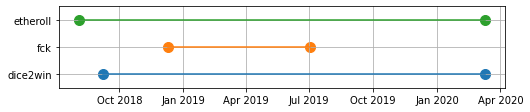

In [41]:
#### import matplotlib.pyplot as plt
import matplotlib.dates as mdates
def visualise_provider_dates(player_bets, providers):
    
    fig = plt.figure(figsize=[8,1.5])
    
    for i, provider in enumerate(providers):
        print(provider)
        provider_bets = df[(df['provider'] == provider)]
        start = provider_bets["bet_time"].min()
        end = provider_bets["bet_time"].max()
        
        plt.plot([start, end], [i,i], label=provider)
        plt.scatter([start, end], [i,i], s=100)
    
    ax = fig.axes[0]
    ax.xaxis.set_major_locator(mdates.MonthLocator([1,4,7,10])) # ticks on first day of each month
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y')) # format of only month (3 letter abbr)
    plt.yticks([0,1,2], providers)
    plt.ylim(-0.5, 2.5)
    plt.grid(True)
    plt.show()
                           
    
visualise_provider_dates(raw_data, providers)